# Pre-Class Assignment: Regression
# Day 13
# CMSE 202

### <p style="text-align: right;"> &#9989; Khushi Lute</p>

## Goals for Preclass

After this pre-class assignment you should be able to:

1. Generate a variety of randomized data
2. Construct a 1-dimensional Linear Regression fit to these data
3. Explain how to judge the quality of a 1-dimensional Linear Regression fit

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into appropriate submission folder on D2L.  Submission instructions can be found at the end of the notebook.

### Imports for the notebook

Make sure you execute the following cell to get all of the imports you will need for this notebook.

&#9989; **Review all of these imports, are any of them unfamiliar to you?** If so, look up the unfamiliar module(s) to learn a bit about what they do.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
from IPython.display import HTML

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with notes on any of the imports that were unfamiliar to you and what they appear to be for. (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
## 1. Regression

In this pre-class assignment, we're going to revisit a concept that you should have explored a bit in CMSE 201: Regression.

The term "Regression" actually represents an entire class of algorithms that are used to **model** data. A regression model provides a way to visualize and predict how a **predictor variable**, usually the x-axis relates to a **dependent variable** usually shown on the y-axis. It is usually a first place to start when trying to build a model of data.

Of the family of regression algorithms, the one most often taught at first is called Ordinary Least Squares, often shortened to OLS. When regression is first discussed in 201, you should have also learned a bit about the OLS approach to regression.

**Let's revisit and review OLS.**

A regression is used to estimate predictor parameters from data. In simple linear regression the x and y data are assumed to be linearly related. That is, there exists an equation:

$$ y = Ax + B $$

such that we must discover the values of $A$, often called the **slope** and of $B$, often called the **intercept** that is somehow optimal. There are many forms of optimization, but we will focus on OLS optimization.

### 1.1 Ordinary Least Squares

The OLS approach to optimizing the parameters above are to "minimize the residuals." The picture below demonstrates the concept of a residual:

<img src="https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=1.0&px=400"> (from <a href="https://community.cloudera.com/t5/Community-Articles/Understanding-Linear-Regression/ta-p/281391"> here </a>)

The idea is to **minimize** the square of the "residuals", that is the sum of the squared error as measured between the line and each actual value. Thus OLS tries to minimize:

$$\min(\sum{{e_i}^2}) =  \min(\sum{({\hat{y_{i}} - y_{i}})^2}) $$

where $e^i$ is the error, more specifically if $\hat{y_i}$ is the predicted value and $y_i$ is the actual value, the error is the difference between the two.

---
## 2. OLS and statsmodels

In 201, when work with regression and fitting models to data, you used some of the built in functions available in NumPy and SciPy, but these are just the tip of the iceberg in terms of what you can do with statistics and regression in Python.

In addition, it's possible you've come across the `sklearn` module (no worries if you haven't) and you might have used it for doing some regression but, at least for some of the model work we want to do right now, the `statsmodel` package provides a little more statistical information and background. We'll certainly use `sklearn` later in the course, but it is always good to learn some alternatives, and there are quite a number available for Python!


#### So what are we going to do?

For this assignment, we are going to make some sample data and do an OLS type regression but, most importantly, we want to pay attention to some of the statistics that are generated from the model. It's all well and good to make a linear regression model, but it is **very** important that we know how good that model is!

### 2.1 Generating random numbers - a quick aside

To generate our sample data we need to use some random numbers. It is important that we understand what a Random Number Generator, RNG for short, is and what we can and cannot do with it.

An RNG is an algorithm for generating random numbers. If you thought about that statement at all, it might trouble you just a bit. By definition an algorithm is a method, a reproducible method, that can be used to accomplish a task. In fact, it is even worse than that. Most RNGs take a `seed` value, a value that initializes the RNG. If you seed an RNG with the same value, you get the same sequence. 

The `random` package provides access to RNG functions. Three approaches that we might find useful are (there are many more, look at <a href="https://docs.python.org/3/library/random.html"> the docs </a>):
* `random.seed()`. If you want to seed the RNG, you provide an argument. If not, a system dependent (often time-based) seed is used.
* `random.int(start, stop)` : generate an **integer** between start and stop **inclusive**
* `random.uniform(start, stop)`: generate a **float** between start and stop **inclusive**
* `random.choice([sequence])` : yield one of the values from the sequence (not the range, the actual values).

In NumPy we can create random numbers in similar ways doing things like `np.random.<METHOD>` (where `<METHOD>` is the method we want to use for generating the random numbers or making random selections), but we can also do things a little differently and first create a random number generator **object** much like we have done when we wrote our own class or used objects from other packages. Below you can find some examples creating random numbers with NumPy.

**Let's quickly review these methods** (you should be a bit familiar with generating random numbers from 201 as well).

In [3]:
import numpy as np

# Create a random number generator
rng = np.random.default_rng(seed=123)

# Create an array of 10 random integers from the domain [1, 5). 1 is included while 5 isn't
ary1 = rng.integers(1, 5, size=10)
ary2 = rng.integers(1, 5, size=10)

# Create another random number generator with the same seed
rng2 = np.random.default_rng(seed=123)
ary3 = rng2.integers(low=1, high=5, size=10)

# Create an array of 10 random floats from a uniform distribution in the domain [0, 1). 0 is included while 1 isn't
f_ar1 = rng.uniform(low=0.0, high=1.0, size=10)

# Print the arrays
print(ary1)
print(ary2)
print(ary3)
print(f_ar1)




[1 3 3 1 4 1 2 1 2 1]
[2 4 2 4 2 2 4 4 4 4]
[1 3 3 1 4 1 2 1 2 1]
[0.51297046 0.2449646  0.8242416  0.21376296 0.74146705 0.6299402
 0.92740726 0.23190819 0.79912513 0.51816504]


`ary1` and `ary2` use the same call and generate different sequences. But if we recreate the RNG with the same seed, we get the same sequence. `ary1` and `ary3` are the same.

What an RNG can provide is randomness of the sequence. That is, using statistical and other measures, predicting what the next number will be given an existing sequence should appear random. It is the sequence, which number comes next, that an RNG tries to randomize. 

It can be convenient to get the same sequence given the same seed, for testing purposes as an example. But the sense of random from an RNG is the randomness of the sequence, not the specific numbers generated.

In the next code cell we will create random numbers from a normal distribution (aka Gaussian) and create and histogram plot from them

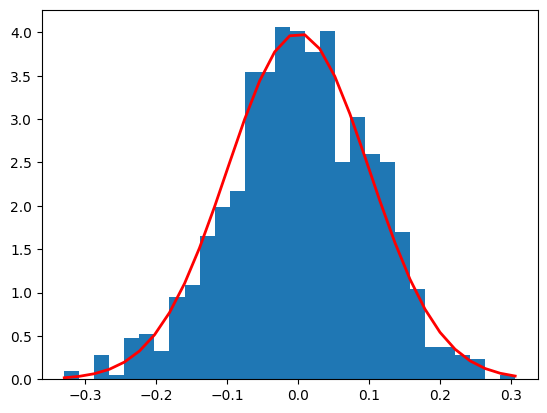

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Gaussian probability density function
def gaussian_dist(x, mu, sigma):
    """Calculate the Gaussian probability density function.
    
    Parameters:
    ----------
    x : numpy.ndarray
        Range of values
    
    mu: float
        Center of the Gaussian PDF.
    
    sigma: float
        Standard deviation of the Gaussian PDF.
    
    Return
    ------
    f : numpy.ndarray
        Gaussian PDF
    """
    f =  np.exp( - (x - mu)**2 / (2 * sigma**2)  )
    f /= (sigma * np.sqrt(2 * np.pi)) 
                
    return f

# Set mean and standard deviation
mu, sigma = 0, 0.1

# Generate 1000 random samples from a normal distribution
rng = np.random.default_rng(seed=123)
s = rng.normal(mu, sigma, 1000)

# Plot histogram and Gaussian PDF
count, bins, _ = plt.hist(s, 30, density=True)
plt.plot(bins, gaussian_dist(bins, mu, sigma), linewidth=2, color='r')
plt.show()



### 2.2 Data

Let's generate some data. 


&#9989; **Do This** - Using `numpy` and `random` as appropriate, let's make the following arrays:
* `x_ary` with float values from 0 to 10 by 0.5 (you can use `arange`)
* `y_ary` that has values that are based on `x_ary` linearly. Let's use $2x + 3$ as our linear relationship. 
* `y_noisy` is created by adding random noise to the values in `y_ary`. Do it uniformly from [-1 to 1]
* `y_fixed` Use the `choice` method of your RNG to add either 5 or -5 to each value in `y_ary`

**Note**: this can be done with just NumPy's modules/methods, if you which to avoid using the built-in Python `random` module.

In [6]:
import numpy as np

# Create the random number generator
rng = np.random.default_rng(seed=123)

# Generate x_ary as float values from 0 to 10 by 0.5
x_ary = np.arange(0, 10.5, 0.5)

# Create y_ary based on a linear relationship (e.g., y = 2 * x + 1)
y_ary = 2 * x_ary + 1

# Add uniform noise from [-1 to 1] to y_ary to create y_noisy
y_noisy = y_ary + rng.uniform(-1, 1, size=len(x_ary))

# Use rng.choice to add either 5 or -5 to each value in y_ary to create y_fixed
y_fixed = y_ary + rng.choice([5, -5], size=len(x_ary))

# Print the results
print("x_ary:", x_ary)
print("y_ary:", y_ary)
print("y_noisy:", y_noisy)
print("y_fixed:", y_fixed)



x_ary: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
y_ary: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21.]
y_noisy: [ 1.36470373  1.10764204  2.44071975  3.36874362  4.3518118   6.62418901
  7.84669     7.5531488   9.63950912 10.77978539 11.02594091 11.4899292
 13.64848319 13.42752593 15.4829341  16.25988041 17.85481452 17.46381638
 19.59825026 20.03633007 20.46311125]
y_fixed: [ 6.  7.  8.  9. 10.  1. 12. 13. 14. 15. 16. 17. 18.  9. 20. 11. 22. 13.
 14. 15. 16.]


&#9989; **Do This** - Plot `x_ary` vs the other three array and see what you have. Here's an example that uses the matplotlib `subplots` functionality to make a stacked column of three plots that used `sharey=True` to ensure the y-axis values use the same ranges as it's already aligned in x by default:

<img src="https://i.ibb.co/G33V3hg/example-plot.png" alt="example-plot" border="0" width=350px>

### 2.3 Doing the fit

Let's now make an OLS fit for these three sets: (`x_ary`, `y_ary`), (`x_ary`, `y_noisy`), (`x_ary`, `y_fixed`). 

&#9989; Before you try to find the fits, think about it for a minute and answer below. **Which do you think will have the best fit? Which the worst fit? Why?**

<font size=+3>&#9998;</font> Do this - Erase this and put your answer here.

Although we already imported this at the top of the notebook, we're going to do the imports here again for `statsmodels` so you can see it in context. As a common practice though, it's still good to put all important imports at the top of the notebook.

In [7]:
import statsmodels.api as sm

If you look at [the statsmodels documentation for OLS](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) you should see that the standard order of operations is to:
* create the model
* fit the model
* look at the results. 

Let's do the "perfect fit" pair above as an example and then you'll do the other two.

In [8]:
model_perfect = sm.OLS(y_ary, x_ary)  # make the model
results = model_perfect.fit()         # run the OLS fit
print(results.params)                 # print intercept and slope

[2.14634146]


**Well that's not right!** We should expect two values: slope and intercept. Let's take a look at the predicted values:

In [9]:
print(results.predict())

[ 0.          1.07317073  2.14634146  3.2195122   4.29268293  5.36585366
  6.43902439  7.51219512  8.58536585  9.65853659 10.73170732 11.80487805
 12.87804878 13.95121951 15.02439024 16.09756098 17.17073171 18.24390244
 19.31707317 20.3902439  21.46341463]


#### So what happened?
So what we actually got was a slope back with the assumption that the intercept was 0. But how to get the correct intercept? The `statsmodels` OLS assumes that every column in the x values can be used as a parameter for regression, called **multiple regression** (which we'll get to a little later). To get an intercept, we need to add a column of constant value, essentially turning the linear equation into:

$$ y = (A*x) + (B*constant) $$

Conveniently, statsmodels has a function just for that called (wait for it) `add_constant`. It adds a constant column to either a DataFrame or as a NumPy array. Let's do that and try the fit again:

In [10]:
x_with_cnst = sm.add_constant(x_ary)
print(x_with_cnst)
model = sm.OLS(y_ary, x_with_cnst)
results = model.fit()
print("Intercept and slope are:", results.params)
print(results.predict())

[[ 1.   0. ]
 [ 1.   0.5]
 [ 1.   1. ]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.5]
 [ 1.   3. ]
 [ 1.   3.5]
 [ 1.   4. ]
 [ 1.   4.5]
 [ 1.   5. ]
 [ 1.   5.5]
 [ 1.   6. ]
 [ 1.   6.5]
 [ 1.   7. ]
 [ 1.   7.5]
 [ 1.   8. ]
 [ 1.   8.5]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.  10. ]]
Intercept and slope are: [1. 2.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21.]


**That's the perfect fit we originally expected!** We can also print a large number of statistics using another built-in method, `summary()`:

In [11]:
print(results.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+32
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          2.38e-294
Time:                        23:53:49   Log-Likelihood:                 677.75
No. Observations:                  21   AIC:                            -1352.
Df Residuals:                      19   BIC:                            -1349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.03e-15   9.69e+14      0.0

#### What does all of this mean?

There is a lot of information there but the top 2 entries of 2nd column is information that tell us about the **quality of the fit**. The R-squared value has a range of 0 to 1.0, with 1.0 being perfect. As expected, ours is perfect. 

_We'll talk about Adjusted R-squared later in multiple regression but it also ranges from 0-1.0 and, in this example, is also perfect._

We can also make plots of the fit using `plot_regress_exog`, which provides a comparison of the real data and the modeled data, as well as the residual plot. 
_There are two additional plots that `plot_regress_exog` produces -- the partial regression plot and the CCPR plot. We will discuss those later._

You should notice that the residuals for this fit are extremely small, this is because of our perfect! As a result, the residuals are numerically equivalent to *zero*.

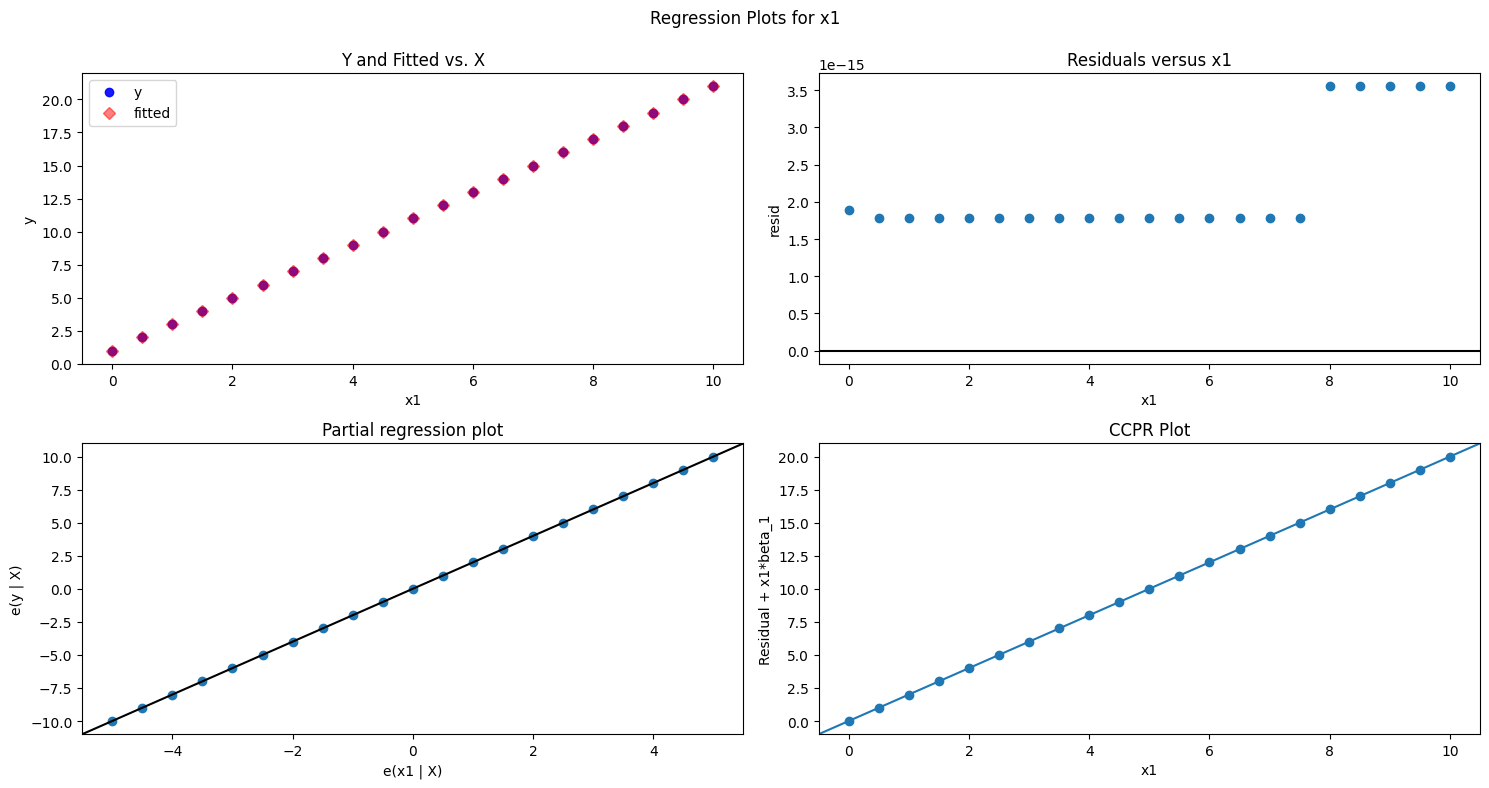

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "x1", fig=fig)

### 2.4 Fit the other two data sets

Now that you've followed along with the example that used our perfect fit, you're going to try to fit the other two "y" arrays.

&#9989; **Do This** - Perform linear model fits for the `y_noisy` and `y_fixed` pairs. **Print**: the fit parameters, the predictions of the model, and the model summaries as we have already done. Also use `plot_regress_exog` to produce plots of the model fits.

**Note**: Make sure you use the new `x_with_cnst` array we created previously to ensure that you get back both a slope and a y-intercept in your best fit parameters.

In [ ]:
# fit the y_fixed code here


&#9989; **Do This**: Between the `noisy` and `fixed` data sets, which has a better linear fit? How can you tell?

<font size=+3>&#9998;</font> Do this - Erase this and put your answer here.

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. When we think about doing regression modeling, what do we mean by "residuals"?

2. What is the value that provides some form of measurement of the "goodness of fit" between our model and our data?

----
# Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [15]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for the appropriate pre-class submission folder (Don't forget to add your name in the first cell).

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University